### Import Library

In [11]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings("ignore")
import pathlib
import PIL
import matplotlib.pyplot as plt

### Data Review

In [12]:
trainDirectory = 'C:/Users/ASUS/Downloads/maclen/klasifikasi buah/train/train'
imageHeight = 100
imageWidth = 100
inputShape = (imageHeight, imageWidth, 3)

In [13]:
imageDataGenerator = ImageDataGenerator(rescale=1./255,
                                vertical_flip=True,
                                horizontal_flip=True,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.1,
                                validation_split=0.2)

testDataGenerator = ImageDataGenerator(rescale=1./255)

trainGenerator = imageDataGenerator.flow_from_directory(trainDirectory,
                                                 shuffle=True,
                                                 batch_size=32,
                                                 subset='training',
                                                 target_size=(100, 100))

validGenerator = imageDataGenerator.flow_from_directory(trainDirectory,
                                                 shuffle=True,
                                                 batch_size=16,
                                                 subset='validation',
                                                 target_size=(100, 100))

Found 13493 images belonging to 33 classes.
Found 3361 images belonging to 33 classes.


### CNN Model

In [14]:
model = Sequential()

model.add(Conv2D(64, (5, 5), activation='relu', padding='Same', input_shape=inputShape))
model.add(Conv2D(64, (5, 5), activation='relu', padding='Same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='Same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='Same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(33, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 64)      4864      
                                                                 
 conv2d_5 (Conv2D)           (None, 100, 100, 64)      102464    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 50, 50, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 128)       147584    
                                                      

In [15]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode='max',
                                        restore_best_weights=True)
history = model.fit(trainGenerator, validation_data=validGenerator,
                   steps_per_epoch=trainGenerator.n//trainGenerator.batch_size,
                    validation_steps=validGenerator.n//validGenerator.batch_size,
                    callbacks=[early],
                   epochs=10)

Epoch 1/10
421/421 [==============================] - 789s 2s/step - loss: 2.2076 - accuracy: 0.3409 - val_loss: 0.7809 - val_accuracy: 0.7783
Epoch 2/10
421/421 [==============================] - 716s 2s/step - loss: 0.9298 - accuracy: 0.6844 - val_loss: 0.3466 - val_accuracy: 0.8902
Epoch 3/10
421/421 [==============================] - 677s 2s/step - loss: 0.5856 - accuracy: 0.8005 - val_loss: 0.1885 - val_accuracy: 0.9354
Epoch 4/10
421/421 [==============================] - 625s 1s/step - loss: 0.4235 - accuracy: 0.8537 - val_loss: 0.1303 - val_accuracy: 0.9595
Epoch 5/10
421/421 [==============================] - 660s 2s/step - loss: 0.3438 - accuracy: 0.8819 - val_loss: 0.1051 - val_accuracy: 0.9705
Epoch 6/10
421/421 [==============================] - 663s 2s/step - loss: 0.2750 - accuracy: 0.9054 - val_loss: 0.0685 - val_accuracy: 0.9792
Epoch 7/10
421/421 [==============================] - 824s 2s/step - loss: 0.2413 - accuracy: 0.9159 - val_loss: 0.0735 - val_accuracy: 0.9744

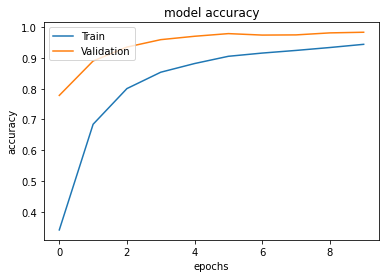

In [16]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

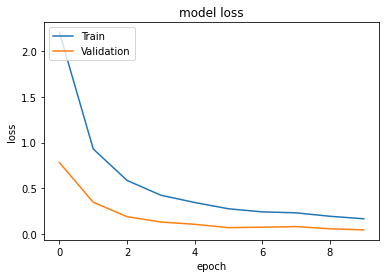

In [17]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##### Saving the model

In [18]:
model.save('model_CNN_saved')

INFO:tensorflow:Assets written to: model_CNN_saved\assets


INFO:tensorflow:Assets written to: model_CNN_saved\assets


In [19]:
model = load_model('model_CNN_saved')
fruitMap = dict([(v, k) for k, v in trainGenerator.class_indices.items()])
fruitMap

{0: 'Apple Braeburn',
 1: 'Apple Granny Smith',
 2: 'Apricot',
 3: 'Avocado',
 4: 'Banana',
 5: 'Blueberry',
 6: 'Cactus fruit',
 7: 'Cantaloupe',
 8: 'Cherry',
 9: 'Clementine',
 10: 'Corn',
 11: 'Cucumber Ripe',
 12: 'Grape Blue',
 13: 'Kiwi',
 14: 'Lemon',
 15: 'Limes',
 16: 'Mango',
 17: 'Onion White',
 18: 'Orange',
 19: 'Papaya',
 20: 'Passion Fruit',
 21: 'Peach',
 22: 'Pear',
 23: 'Pepper Green',
 24: 'Pepper Red',
 25: 'Pineapple',
 26: 'Plum',
 27: 'Pomegranate',
 28: 'Potato Red',
 29: 'Raspberry',
 30: 'Strawberry',
 31: 'Tomato',
 32: 'Watermelon'}

##### klasifikasi gambar

1/1 [==============================] - 0s 41ms/step
Gambar ini termasuk Raspberry dengan akurasi ketepatan sebesar 100.00 %


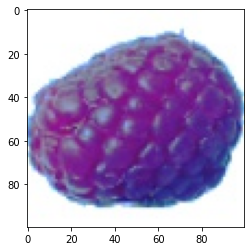

In [21]:
samplePath = pathlib.Path("C:/Users/ASUS/Downloads/maclen/klasifikasi buah/test/test/5432.jpg")

image = tf.keras.preprocessing.image.load_img(
    samplePath, target_size=(100, 100)
)

plt.imshow(image)
image = np.array(image)
image = image / 255.0
image = image.reshape(1,imageWidth,imageHeight,3)
predictions = model.predict(image)
predictions
score = tf.nn.softmax(predictions[0])
print("Gambar ini termasuk {} dengan akurasi ketepatan sebesar {:.2f} %".format(fruitMap[np.argmax(score)],100 * np.max(predictions)))